In [1]:
import utils
import utils.analysis

import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.datasets import make_blobs
import seaborn as sns

# Data

## Associations

In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Clusters

In [3]:
# create synthetic data with clusters
X, _ = make_blobs(n_samples=1000, centers=3, n_features=6, random_state=42)
synthetic_cluster_data = pd.DataFrame(X, columns=['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6'])

# binarize the data
synthetic_cluster_data = (synthetic_cluster_data > synthetic_cluster_data.median()).astype(int)

synthetic_cluster_data

,var_1,var_2,var_3,var_4,var_5,var_6
0,1,0,0,0,1,1
1,0,0,0,1,0,1
2,1,1,1,1,1,0
3,0,1,0,1,0,1
4,1,1,1,0,0,0
...,...,...,...,...,...,...
995,0,0,0,1,0,1
996,1,1,1,1,1,0
997,1,0,0,0,1,1
998,1,0,0,0,1,0


# Logit

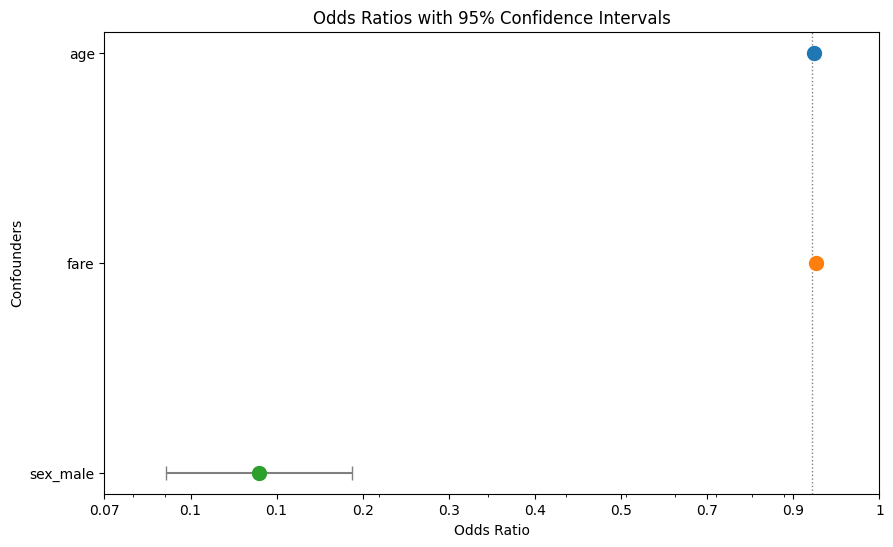

In [4]:
logit_model = utils.analysis.logit(
    data=titanic, 
    outcome='survived', 
    confounders=['age', 'fare', 'sex'], 
    categorical_vars=['sex'],
    dropna=True,
    show_forest_plot=True,
    custom_colors=list(sns.color_palette('tab10', n_colors=3))
)

# LCA

Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 543.44it/s, max_LL=-2.77e+3, max_avg_LL=-4.16]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 331.78it/s, max_LL=-2.77e+3, max_avg_LL=-4.16]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 690.65it/s, max_LL=-2.77e+3, max_avg_LL=-4.16]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 239.29it/s, max_LL=-2.13e+3, max_avg_LL=-3.2]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 138.94it/s, max_LL=-2.15e+3, max_avg_LL=-3.23]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 116.27it/s, max_LL=-2.13e+3, max_avg_LL=-3.19]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 219.20it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 149.90it/s, max_LL=-1.71e+3, max_avg_LL=-2.57]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 128.88it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.74it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.67it/s, max_LL=-1.71e+3, max_avg_LL=-2.57]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 14.69it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.26it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.32it/s, max_LL=-1.71e+3, max_avg_LL=-2.56]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.38it/s, max_LL=-1.69e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.24it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.24it/s, max_LL=-1.71e+3, max_avg_LL=-2.56]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.28it/s, max_LL=-1.69e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.84it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.79it/s, max_LL=-1.71e+3, max_avg_LL=-2.56]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.78it/s, max_LL=-1.68e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.04it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  6.08it/s, max_LL=-1.7e+3, max_avg_LL=-2.56]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.99it/s, max_LL=-1.68e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.70it/s, max_LL=-1.69e+3, max_avg_LL=-2.54]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.71it/s, max_LL=-1.7e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.68it/s, max_LL=-1.69e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 12.80it/s, max_LL=-1.69e+3, max_avg_LL=-2.53]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.27it/s, max_LL=-1.7e+3, max_avg_LL=-2.56]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  5.38it/s, max_LL=-1.68e+3, max_avg_LL=-2.52]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 151.20it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 659.27it/s, max_LL=-4.16e+3, max_avg_LL=-4.16]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 114.07it/s, max_LL=-3.21e+3, max_avg_LL=-3.21]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 156.98it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 95.25it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.86it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.73it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.38it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.61it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  4.40it/s, max_LL=-2.55e+3, max_avg_LL=-2.55]


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00,  3.67it/s, max_LL=-2.54e+3, max_avg_LL=-2.54]


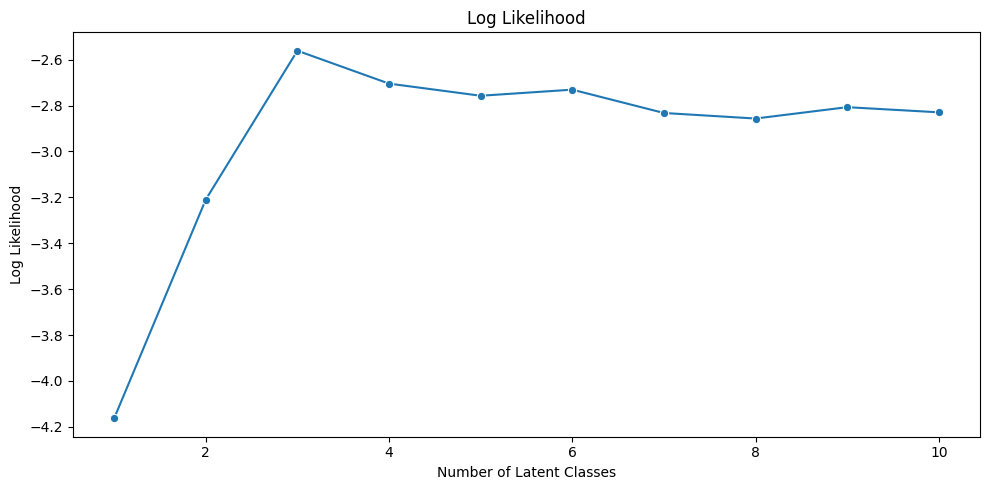

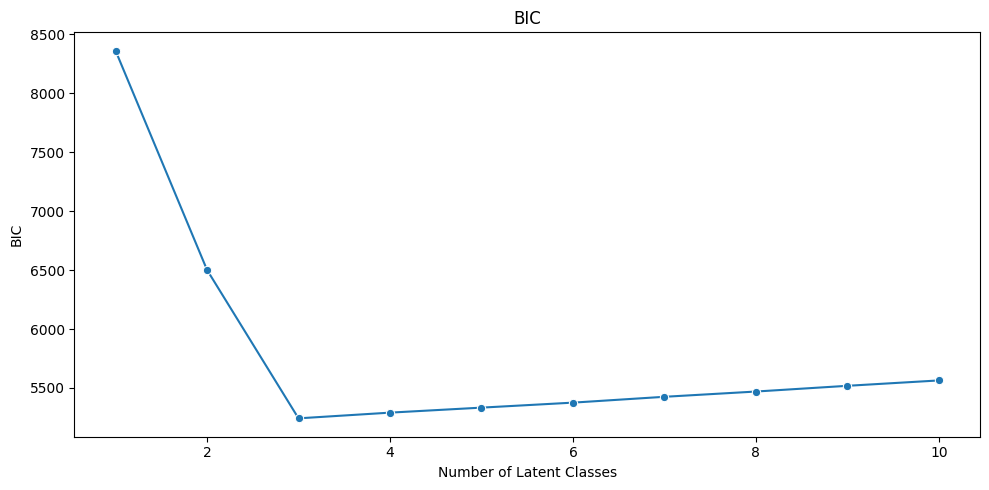

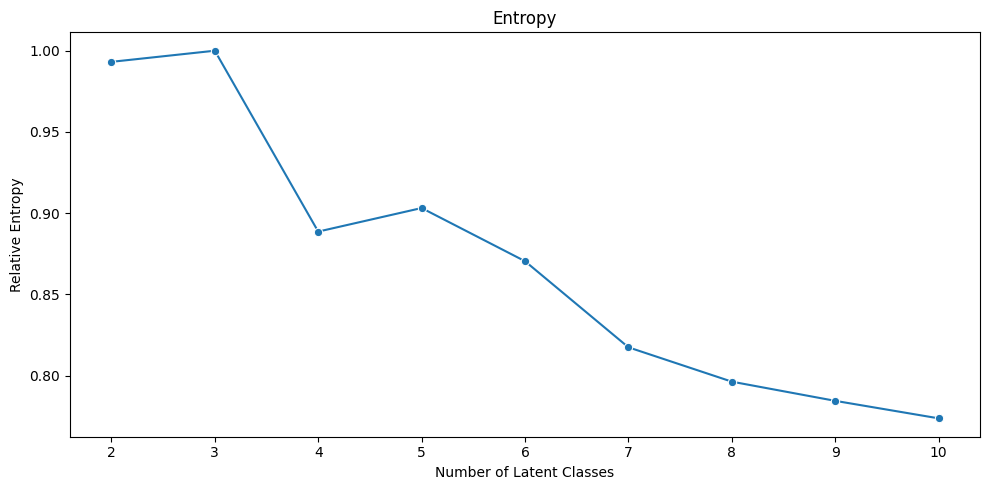

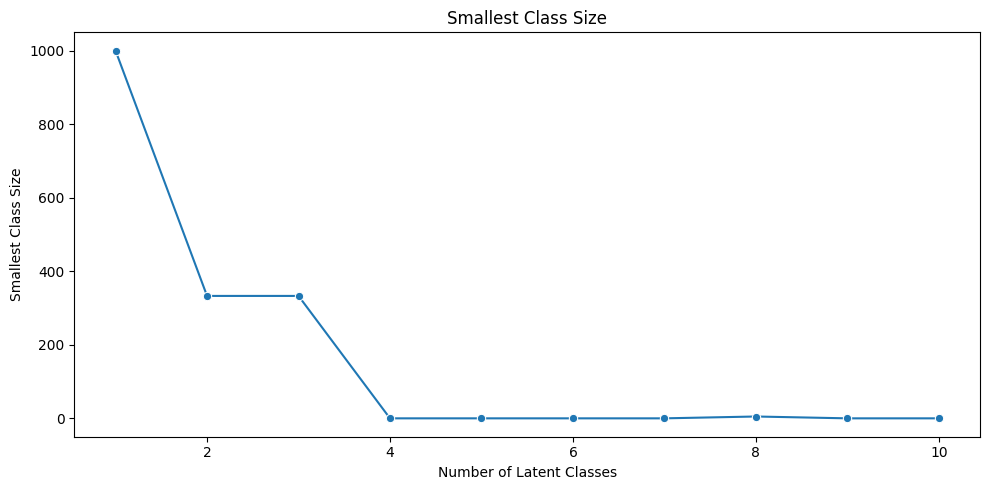

In [5]:
lca_model, assignments = utils.analysis.lca(
    data=synthetic_cluster_data, 
    return_assignments=True, 
    show_polar_plot=True, 
    show_metrics=True
)

In [6]:
new_data = pd.DataFrame(np.random.randint(0, 2, size=(100, 6)), columns=['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6'])

predictions = utils.analysis.lca(
    data=new_data,
    trained_model=lca_model,
    return_assignments=True,
    show_polar_plot=True
)